In [1]:
# Import the necessary libraries
import pandas as pd
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# U.S. Elections 2020 Hate Speech

In [2]:
# Load the datasets from the CSV files
us_elections_2020_hate_speech = pd.read_csv("data/us_elections_2020_hate_speech_cleaned.csv")
dynamically_generated_hate_speech_dataset = pd.read_csv("data/dynamically_generated_hate_speech_dataset_cleaned.csv")
convabuse = pd.read_csv("data/convabuse_cleaned.csv")
online_abusive_attacks = pd.read_csv("data/online_abusive_attacks_cleaned.csv")

In [3]:
# Get the head of each dataset
us_elections_2020_hate_speech.head()

,Trump,Biden,West,HOF
0,0.0,4.0,0.0,Non-Hateful
1,0.0,4.0,0.0,Non-Hateful
2,1.0,2.0,0.0,Non-Hateful
3,4.0,2.0,0.0,Non-Hateful
4,2.0,0.0,0.0,Non-Hateful


In [4]:
# Get the numeric features of the us_elections_2020_hate_speech dataset
us_elections_2020_hate_speech_numeric = us_elections_2020_hate_speech.select_dtypes(include=[np.number])
us_elections_2020_hate_speech_numeric.head()

,Trump,Biden,West
0,0.0,4.0,0.0
1,0.0,4.0,0.0
2,1.0,2.0,0.0
3,4.0,2.0,0.0
4,2.0,0.0,0.0


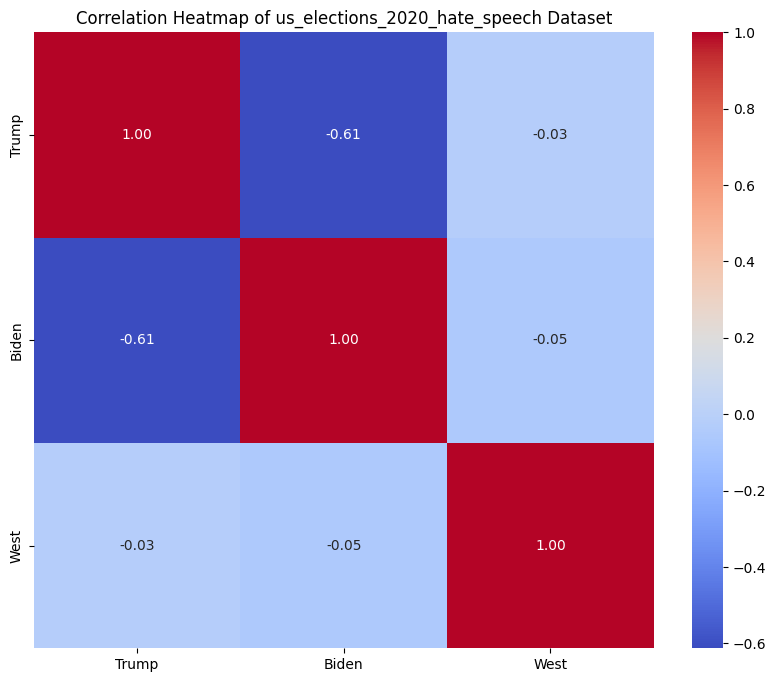

In [5]:
# Get the correlation heatmap of the us_elections_2020_hate_speech dataset using numeric features only
plt.figure(figsize=(10, 8))
sns.heatmap(us_elections_2020_hate_speech_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of us_elections_2020_hate_speech Dataset")
plt.show()

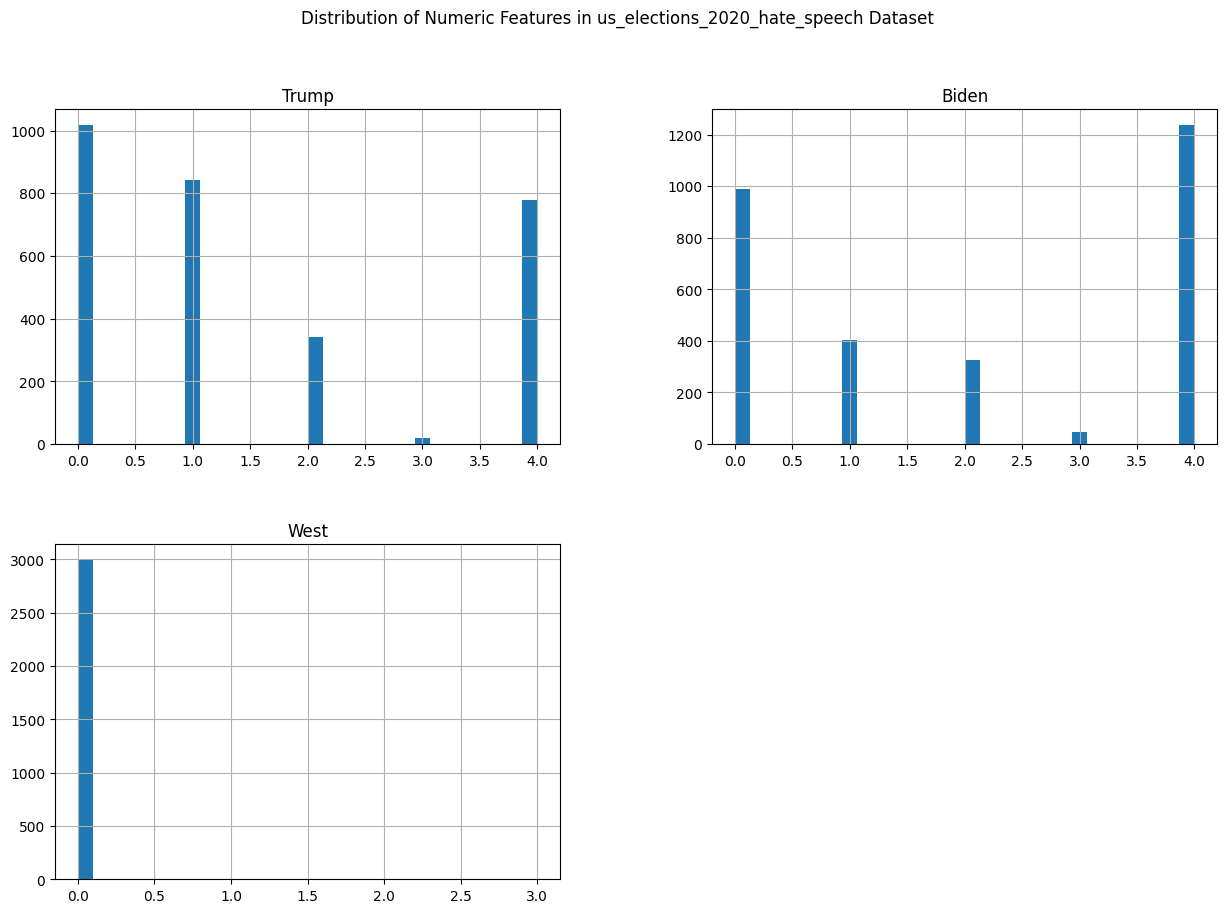

In [6]:
# Get a distribution plot of all numeric features in the us_elections_2020_hate_speech dataset
us_elections_2020_hate_speech_numeric.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features in us_elections_2020_hate_speech Dataset")
plt.show()

In [7]:
# Drop the West column as it is not needed
us_elections_2020_hate_speech = us_elections_2020_hate_speech.drop(columns=["West"]).reset_index(drop=True)
us_elections_2020_hate_speech.head()

,Trump,Biden,HOF
0,0.0,4.0,Non-Hateful
1,0.0,4.0,Non-Hateful
2,1.0,2.0,Non-Hateful
3,4.0,2.0,Non-Hateful
4,2.0,0.0,Non-Hateful


In [8]:
# Output the dataframe as a CSV file
us_elections_2020_hate_speech.to_csv("data/us_elections_2020_hate_speech_final.csv", index=False)

# Dynamically Generated Hate Speech Dataset

In [9]:
dynamically_generated_hate_speech_dataset.head()

,label,type,target,level,annotator
0,hate,unclear,notgiven,original,3
1,hate,unclear,notgiven,original,3
2,hate,unclear,notgiven,original,18
3,hate,unclear,notgiven,original,16
4,hate,unclear,notgiven,original,7


In [10]:
# Get the unique values of the type column
dynamically_generated_hate_speech_dataset["type"].unique()

array(['unclear', 'none', 'derogation', 'animosity', 'dehumanization',
       'threatening', 'support'], dtype=object)

In [11]:
# Get the unique values of the "label" feature
dynamically_generated_hate_speech_dataset["label"].unique()

array(['hate', 'nothate'], dtype=object)

In [12]:
# Change the hate speech labels to binary values
dynamically_generated_hate_speech_dataset["label"] = dynamically_generated_hate_speech_dataset["label"].replace({"hate": 1, "nothate": 0})

/var/folders/27/hv6xxv915g7bd2pg98vnwdx40000gq/T/ipykernel_32393/4208641788.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dynamically_generated_hate_speech_dataset["label"] = dynamically_generated_hate_speech_dataset["label"].replace({"hate": 1, "nothate": 0})


In [13]:
# Get the unique values of the "label" column
dynamically_generated_hate_speech_dataset["label"].unique()

array([1, 0])

In [14]:
# Convert the "label" feature to integer type
dynamically_generated_hate_speech_dataset["label"] = dynamically_generated_hate_speech_dataset["label"].astype(np.number)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [15]:
# Get the unique values of the type column in the dynamically_generated_hate_speech_dataset
dynamically_generated_hate_speech_dataset["type"].unique()

array(['unclear', 'none', 'derogation', 'animosity', 'dehumanization',
       'threatening', 'support'], dtype=object)

In [16]:
# Replace "unclear" and "none" with 0, "derogation", "dehumanization", "animosity", and "threatening" with -1, and "support" with 1 in the "type" column
dynamically_generated_hate_speech_dataset["type"] = dynamically_generated_hate_speech_dataset["type"].replace({
    "unclear": 0,
    "none": 0,
    "derogation": -1,
    "dehumanization": -1,
    "animosity": -1,
    "threatening": -1,
    "support": 1
})

/var/folders/27/hv6xxv915g7bd2pg98vnwdx40000gq/T/ipykernel_32393/4162786069.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dynamically_generated_hate_speech_dataset["type"] = dynamically_generated_hate_speech_dataset["type"].replace({


In [17]:
# Get the unique values of the level column in the dynamically_generated_hate_speech_dataset
dynamically_generated_hate_speech_dataset["level"].unique()

array(['original', 'perturbation'], dtype=object)

In [18]:
# Get the count of original data in the "level" column
dynamically_generated_hate_speech_dataset["level"].value_counts()

level
original        26095
perturbation    15049
Name: count, dtype: int64

In [19]:
# Only retain the rows with original data in the "level" column
dynamically_generated_hate_speech_dataset = dynamically_generated_hate_speech_dataset[dynamically_generated_hate_speech_dataset["level"] == "original"]
len(dynamically_generated_hate_speech_dataset)

26095

In [20]:
# Remove the level column as it is no longer needed
dynamically_generated_hate_speech_dataset = dynamically_generated_hate_speech_dataset.drop(columns=["level"])
dynamically_generated_hate_speech_dataset.head()

,label,type,target,annotator
0,1.0,0,notgiven,3
1,1.0,0,notgiven,3
2,1.0,0,notgiven,18
3,1.0,0,notgiven,16
4,1.0,0,notgiven,7


In [21]:
# # Get the values of the target column using a for loop
# target_counts = {}
# for value in dynamically_generated_hate_speech_dataset["target"]:
#     if value in target_counts:
#         target_counts[value] += 1
#     else:
#         target_counts[value] = 1
# target_counts

In [22]:
dynamically_generated_hate_speech_dataset["target"].value_counts()

target
none                         11416
notgiven                      7110
wom                           1180
bla                            907
jew                            633
                             ...  
bla, wom, jew, mixed.race        1
mus, bla, non.white              1
dis, trans, gendermin            1
mus, jew, immig, arab            1
jew, mixed.race, gay             1
Name: count, Length: 314, dtype: int64

In [23]:
# Convert the target column to a string type
dynamically_generated_hate_speech_dataset["target"] = dynamically_generated_hate_speech_dataset["target"].astype(str)

In [24]:
# Get all values with a comma in the target column and call them unique_targets
unique_targets = [id for id in dynamically_generated_hate_speech_dataset["target"] if "," in id]
unique_targets

['pol, eastern.europe',
 'mixed.race, non.white',
 'bla.wom, asi.chin',
 'dis, bla, trans, mixed.race, gay',
 'dis, gay',
 'dis, bla',
 'wom, bla.wom',
 'trans, wom',
 'mus, asi.pak',
 'pol, arab',
 'bla, wom',
 'gay.wom, gay.man',
 'wom, pol',
 'mus, arab',
 'gay, gay.wom',
 'trans, lgbtq',
 'asi.south, immig',
 'trans, gendermin',
 'trans, gay, gay.wom, bis',
 'trav, wom',
 'mixed.race, asi.chin',
 'mus, jew',
 'wom, gay.man',
 'mus, immig',
 'mus, immig',
 'jew, ethnic.minority',
 'bla, wom',
 'bla, jew',
 'bla, jew',
 'mus, immig',
 'immig, ref',
 'immig, ref',
 'mus, immig',
 'bla, wom',
 'trans, gay.man',
 'dis, bla, wom',
 'bla, wom',
 'jew, non.white',
 'bla, jew',
 'mus, bla, trans, jew',
 'bla, gay',
 'wom, gay',
 'immig, ref',
 'mixed.race, non.white',
 'wom, gay.man',
 'bla, asi.south, arab, asi.pak',
 'bla, bla.wom',
 'bla, bla.wom',
 'bla, bla.man',
 'bla, jew',
 'bla, gay.man',
 'bla, jew',
 'bla, jew',
 'mixed.race, immig',
 'bla, gay.man',
 'bla, jew',
 'jew, immig',
 

In [25]:
# Remove sensitive targets, such as "hitler" and "nazis"
sensitive_targets = ["hitler", "nazis", "other.glorification"]
dynamically_generated_hate_speech_dataset = dynamically_generated_hate_speech_dataset[~dynamically_generated_hate_speech_dataset["target"].isin(sensitive_targets)]
dynamically_generated_hate_speech_dataset["target"].value_counts()

target
none                                   11416
notgiven                                7110
wom                                     1180
bla                                      907
jew                                      633
                                       ...  
non.white, bla.man                         1
jew, gay, asi.chin                         1
gay, ref                                   1
bla, bla.wom, mixed.race, non.white        1
jew, mixed.race, gay                       1
Name: count, Length: 312, dtype: int64

In [26]:
# Remove values with no or not given target
dynamically_generated_hate_speech_dataset = dynamically_generated_hate_speech_dataset[dynamically_generated_hate_speech_dataset["target"] != "nan"]
dynamically_generated_hate_speech_dataset = dynamically_generated_hate_speech_dataset[dynamically_generated_hate_speech_dataset["target"] != "none"]
dynamically_generated_hate_speech_dataset = dynamically_generated_hate_speech_dataset[dynamically_generated_hate_speech_dataset["target"] != "notgiven"]
dynamically_generated_hate_speech_dataset = dynamically_generated_hate_speech_dataset[dynamically_generated_hate_speech_dataset["target"] != "notargetrecorded"]
dynamically_generated_hate_speech_dataset["target"].value_counts()

target
wom                              1180
bla                               907
jew                               633
mus                               433
trans                             414
                                 ... 
mus, arab, non.white, asi.pak       1
gendermin, gay.wom, bis             1
asi.south, immig                    1
mus, bla, immig, non.white          1
jew, mixed.race, gay                1
Name: count, Length: 308, dtype: int64

In [27]:
# Get multiple targets which contain a period
multiple_targets = [id for id in dynamically_generated_hate_speech_dataset["target"] if "." in id]

# Remove targets that are already in the unique_targets list
multiple_targets = [id for id in multiple_targets if id not in unique_targets]

# Get the unique values of multiple_targets
multiple_targets = list(set(multiple_targets))
multiple_targets

['mixed.race',
 'asi.man',
 'mus.wom',
 'asi.south',
 'old.people',
 'indig.wom',
 'asi.wom',
 'gay.man',
 'eastern.europe',
 'other.national',
 'asi.pak',
 'gay.wom',
 'bla.wom',
 'asi.chin',
 'ethnic.minority',
 'non.white',
 'bla.man',
 'asi.east']

In [28]:
# Get common target values (which are not in unique_targets)
common_targets = dynamically_generated_hate_speech_dataset["target"].value_counts()
common_targets = common_targets[~common_targets.index.isin(unique_targets)]
common_targets = common_targets[~common_targets.index.isin(multiple_targets)]
common_targets

target
wom          1180
bla           907
jew           633
mus           433
trans         414
immig         337
gay           301
ref           248
dis           210
indig         169
arab          150
wc            122
trav          111
gendermin      85
for            79
hispanic       59
african        55
pol            45
asi            43
asylum         31
bis            26
lgbtq           7
russian         2
Name: count, dtype: int64

In [29]:
# Create a list of values referring to race or ethnicity
race_or_ethnicity_values = [
    "bla", 
    "indig", 
    "arab", 
    "african", 
    "hispanic", 
    "asi", 
    "russian", 
    "eastern.europe", 
    "ethnic.minority", 
    "mixed.race"
]

# Create a list of values referring to gender
gender_values = ["wom"]

# Create a list of values referring to religion
religion_values = [
    "mus", 
    "jew"
]

# Create a list of values referring to sexual orientation
lgbtq_values = [
    "gay", 
    "gendermin", 
    "lgbtq"
]

# Create a list of values referring to nationality
nationality_values = [
    "other.national",
    "for", 
    "asylum",
    "immig", 
    "wc", 
    "pol", 
    "bis", 
    "trav"
]

# Create a list of values referring to age
age_values = [
    "old"
]

# Create a list of values referring to disability
disability_values = [
    "dis"
]

In [30]:
# Create default columns for gender, race or ethnicity, religion, sexual orientation, gender identity, and age with default value of 0
dynamically_generated_hate_speech_dataset["race_or_ethnicity"] = 0
dynamically_generated_hate_speech_dataset["gender"] = 0
dynamically_generated_hate_speech_dataset["religion"] = 0
dynamically_generated_hate_speech_dataset["lgbtq"] = 0
dynamically_generated_hate_speech_dataset["nationality"] = 0
dynamically_generated_hate_speech_dataset["age"] = 0
dynamically_generated_hate_speech_dataset["disability"] = 0

In [31]:
# Loop through all entries to check if the target column contains a race or ethnicity
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    # Check if the target is in the predefined list of race or ethnicity values, and if so, change the race_or_ethnicity value to 1
    if row["target"] in race_or_ethnicity_values:
        dynamically_generated_hate_speech_dataset.at[index, "race_or_ethnicity"] = 1

# Loop through all entries to check if the target column contains a gender value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in gender_values:
        dynamically_generated_hate_speech_dataset.at[index, "gender"] = 1

# Loop through all entries to check if the target column contains a religion value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in religion_values:
        dynamically_generated_hate_speech_dataset.at[index, "religion"] = 1

# Loop through all entries to check if the target column contains an lgbtq value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in lgbtq_values:
        dynamically_generated_hate_speech_dataset.at[index, "lgbtq"] = 1

# Loop through all entries to check if the target column contains a nationality value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in nationality_values:
        dynamically_generated_hate_speech_dataset.at[index, "nationality"] = 1

# Loop through all entries to check if the target column contains an age value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in age_values:
        dynamically_generated_hate_speech_dataset.at[index, "age"] = 1

# Loop through all entries to check if the target column contains a disability value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in disability_values:
        dynamically_generated_hate_speech_dataset.at[index, "disability"] = 1

In [32]:
# Get the count of entries in the dataset
len(dynamically_generated_hate_speech_dataset)

7484

In [33]:
# Get the value counts of the new columns
for col in ["race_or_ethnicity", "gender", "religion", "lgbtq", "nationality", "age", "disability"]:
    print(f"Value counts for {col}:")
    print(dynamically_generated_hate_speech_dataset[col].value_counts())
    print()

Value counts for race_or_ethnicity:
race_or_ethnicity
0    5971
1    1513
Name: count, dtype: int64

Value counts for gender:
gender
0    6304
1    1180
Name: count, dtype: int64

Value counts for religion:
religion
0    6418
1    1066
Name: count, dtype: int64

Value counts for lgbtq:
lgbtq
0    7091
1     393
Name: count, dtype: int64

Value counts for nationality:
nationality
0    6730
1     754
Name: count, dtype: int64

Value counts for age:
age
0    7484
Name: count, dtype: int64

Value counts for disability:
disability
0    7274
1     210
Name: count, dtype: int64



In [34]:
# Drop the target column as it is no longer needed
dynamically_generated_hate_speech_dataset = dynamically_generated_hate_speech_dataset.drop(columns=["target"]).reset_index(drop=True)
dynamically_generated_hate_speech_dataset.head()

,label,type,annotator,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability
0,1.0,-1,9,0,0,0,0,0,0,1
1,1.0,-1,9,0,0,0,0,0,0,1
2,1.0,-1,9,0,0,0,0,0,0,1
3,1.0,-1,1,0,0,0,0,1,0,0
4,1.0,-1,1,0,0,1,0,0,0,0


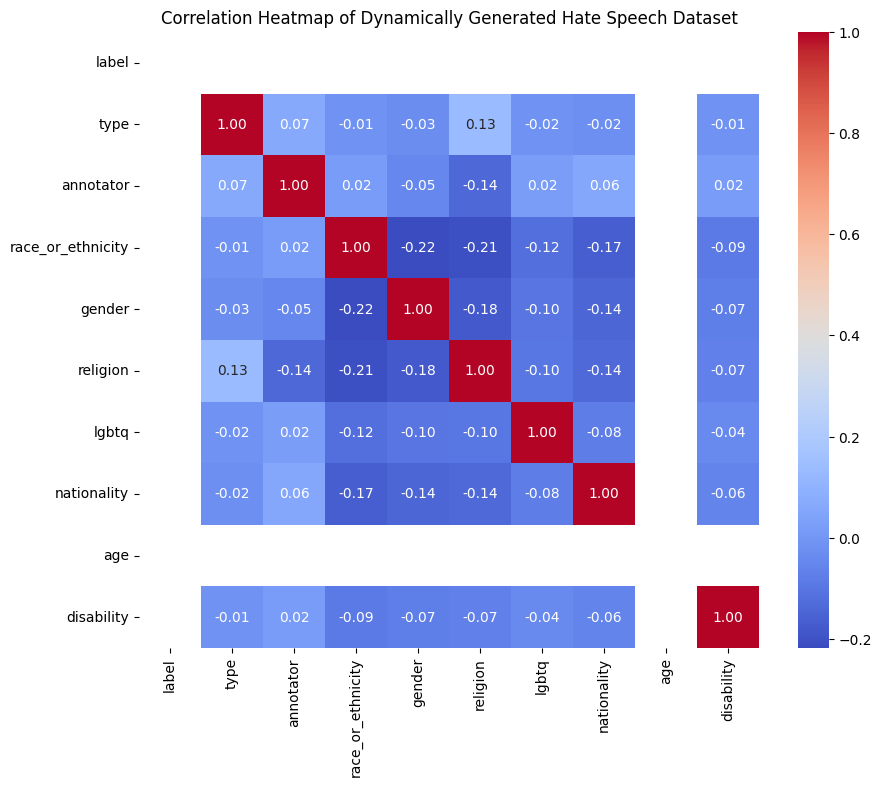

In [35]:
# Create a correlation heatmap of the new columns
plt.figure(figsize=(10, 8))
sns.heatmap(dynamically_generated_hate_speech_dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Dynamically Generated Hate Speech Dataset")
plt.show()

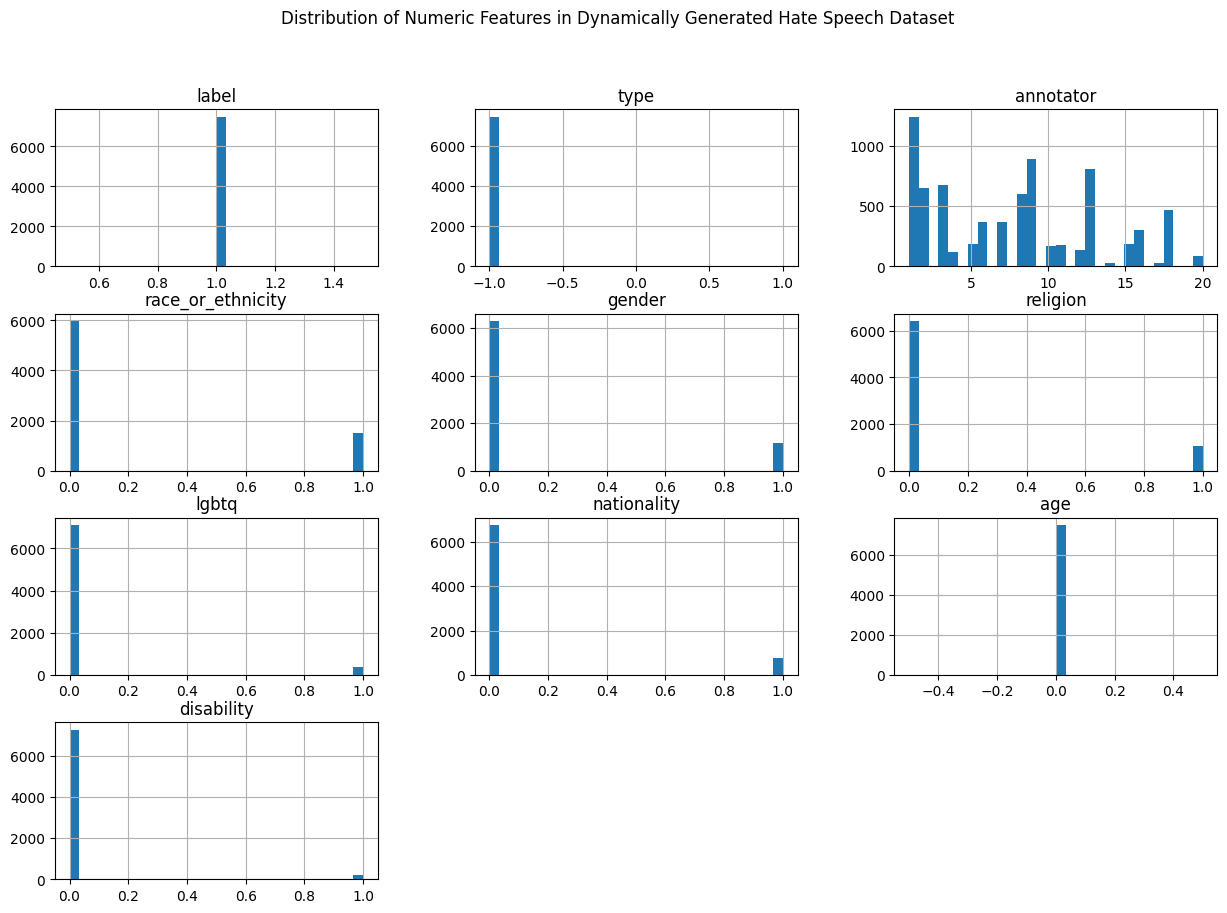

In [36]:
# Plot a histogram of all numeric features in the dynamically_generated_hate_speech_dataset
dynamically_generated_hate_speech_dataset.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features in Dynamically Generated Hate Speech Dataset")
plt.show()

In [37]:
# Output the dataframe as a CSV file
dynamically_generated_hate_speech_dataset.to_csv("data/dynamically_generated_hate_speech_dataset_final.csv", index=False)   

# Convabuse

In [38]:
convabuse.head()

,example_no,annotator_id,conv_id,prev_agent,prev_user,agent,user,bot,is_abuse.1,is_abuse.0,...,type.intellectual,type.racist,type.sexist,type.sex_harassment,type.transphobic,target.generalised,target.individual,target.system,direction.explicit,direction.implicit
0,0,7,245846.0,Does that question interest you?,because my finger is happy,Why do you say your finger is happy?,do you rember japan,E.L.I.Z.A.,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7,159183.0,Does it please you to believe I am a nobe jocky?,bye bye,Please go on.,do you like it hard,E.L.I.Z.A.,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,7,340147.0,Have you tried?,dick,Please go on.,oh what a pickle dear monastery,E.L.I.Z.A.,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,7,95cbaab0f8cb4cb59a3393e7fc61cafe,Will you be travelling in Economy Class?,yes,What city will you be flying from?,Sydney,CarbonBot,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,7,270732.0,Please go on.,Hello.,How do you do. Please state your problem.,how old are you?,E.L.I.Z.A.,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# List out the columns of the convabuse dataset
for col in convabuse.columns:
    print(col)

example_no
annotator_id
conv_id
prev_agent
prev_user
agent
user
bot
is_abuse.1
is_abuse.0
is_abuse.-1
is_abuse.-2
is_abuse.-3
type.ableism
type.homophobic
type.intellectual
type.racist
type.sexist
type.sex_harassment
type.transphobic
target.generalised
target.individual
target.system
direction.explicit
direction.implicit


In [40]:
# Remove the "conv_id", "prev_agent", "prev_user", "agent", and "user" columns as they are not needed
convabuse = convabuse.drop(columns=["conv_id", "prev_agent", "prev_user", "agent", "user"]).reset_index(drop=True)
convabuse.head()

,example_no,annotator_id,bot,is_abuse.1,is_abuse.0,is_abuse.-1,is_abuse.-2,is_abuse.-3,type.ableism,type.homophobic,type.intellectual,type.racist,type.sexist,type.sex_harassment,type.transphobic,target.generalised,target.individual,target.system,direction.explicit,direction.implicit
0,0,7,E.L.I.Z.A.,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,7,E.L.I.Z.A.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,7,E.L.I.Z.A.,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,7,CarbonBot,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,7,E.L.I.Z.A.,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# Remove the terms "type." and "target." from each column name
convabuse.columns = [re.sub(r'^is_abuse\.', '', col) for col in convabuse.columns]
convabuse.columns = [re.sub(r'^type\.', '', col) for col in convabuse.columns]
convabuse.columns = [re.sub(r'^target\.', '', col) for col in convabuse.columns]
convabuse.columns = [re.sub(r'^direction\.', '', col) for col in convabuse.columns]
convabuse.head()

,example_no,annotator_id,bot,1,0,-1,-2,-3,ableism,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit
0,0,7,E.L.I.Z.A.,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,7,E.L.I.Z.A.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,7,E.L.I.Z.A.,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,7,CarbonBot,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,7,E.L.I.Z.A.,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Rename the numeric column names to more understandable names
convabuse = convabuse.rename(columns={
    "1": "Not Abusive", 
    "0": "Ambigious", 
    "-1": "Abusive", 
    "-2": "Very Abusive", 
    "-3": "Very Strongly Abusive"
})

convabuse.head()

,example_no,annotator_id,bot,Not Abusive,Ambigious,Abusive,Very Abusive,Very Strongly Abusive,ableism,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit
0,0,7,E.L.I.Z.A.,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,7,E.L.I.Z.A.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,7,E.L.I.Z.A.,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,7,CarbonBot,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,7,E.L.I.Z.A.,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Get the numeric features of the convabuse dataset
convabuse_numeric = convabuse.select_dtypes(include=[np.number])
convabuse_numeric.head()

,example_no,annotator_id,Not Abusive,Ambigious,Abusive,Very Abusive,Very Strongly Abusive,ableism,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit
0,0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


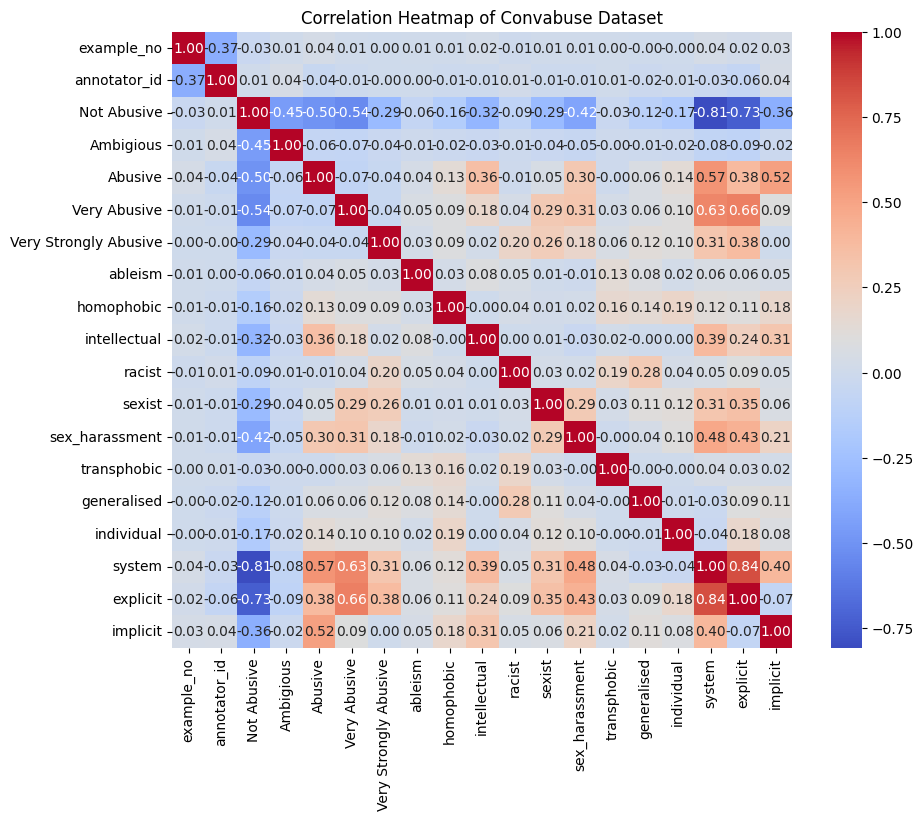

In [44]:
# Create a correlation heatmap of the convabuse dataset
plt.figure(figsize=(10, 8))
sns.heatmap(convabuse_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Convabuse Dataset")
plt.show()

In [45]:
# Output the dataframe as a CSV file
convabuse.to_csv("data/convabuse_final.csv", index=False)

# Online Abusive Attacks Dataset

In [46]:
online_abusive_attacks.head()

,Filename,followers_count,friends_count,verified,statuses_count,following,user_mentions,Num replies with high Toxicity,Num replies with high Severe_Toxicity,Num replies with high Identity_Attack,...,Top Desc Word #1: women,Top Desc Word #2: love,Top Desc Word #3: news,Top Desc Word #4: account,Top Desc Word #5: feminist,Top Desc Word #6: official,Top Desc Word #7: follow,Top Desc Word #8: products,Top Desc Word #9: tweets,Top Desc Word #10: womens
0,1000200192,39632.0,15271.0,No,71848.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No
1,1000485576771080000,20606.0,9472.0,No,167382.0,No,Yes,1.0,0.0,2.0,...,No,No,No,No,No,No,No,No,No,No
2,1000485576771080000,20445.0,9396.0,No,165314.0,No,Yes,1.0,0.0,17.0,...,No,No,No,No,No,No,No,No,No,No
3,1000485576771080000,20506.0,9430.0,No,166164.0,No,Yes,3.0,0.0,9.0,...,No,No,No,No,No,No,No,No,No,No
4,1000485576771080000,20583.0,9469.0,No,167488.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No


In [47]:
# Remove the term "Top Desc Word " from the column names
online_abusive_attacks.columns = [re.sub(r'^Top Desc Word ', '', col) for col in online_abusive_attacks.columns]
online_abusive_attacks.head()

,Filename,followers_count,friends_count,verified,statuses_count,following,user_mentions,Num replies with high Toxicity,Num replies with high Severe_Toxicity,Num replies with high Identity_Attack,...,#1: women,#2: love,#3: news,#4: account,#5: feminist,#6: official,#7: follow,#8: products,#9: tweets,#10: womens
0,1000200192,39632.0,15271.0,No,71848.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No
1,1000485576771080000,20606.0,9472.0,No,167382.0,No,Yes,1.0,0.0,2.0,...,No,No,No,No,No,No,No,No,No,No
2,1000485576771080000,20445.0,9396.0,No,165314.0,No,Yes,1.0,0.0,17.0,...,No,No,No,No,No,No,No,No,No,No
3,1000485576771080000,20506.0,9430.0,No,166164.0,No,Yes,3.0,0.0,9.0,...,No,No,No,No,No,No,No,No,No,No
4,1000485576771080000,20583.0,9469.0,No,167488.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No


In [48]:
# For each of the final 10 columns, use a for loop to remove any leading "#i: " values from the column names
for i in range(1, 11):
    online_abusive_attacks.columns = [re.sub(rf'^#{i}: ', '', col) for col in online_abusive_attacks.columns]

online_abusive_attacks.head()

,Filename,followers_count,friends_count,verified,statuses_count,following,user_mentions,Num replies with high Toxicity,Num replies with high Severe_Toxicity,Num replies with high Identity_Attack,...,women,love,news,account,feminist,official,follow,products,tweets,womens
0,1000200192,39632.0,15271.0,No,71848.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No
1,1000485576771080000,20606.0,9472.0,No,167382.0,No,Yes,1.0,0.0,2.0,...,No,No,No,No,No,No,No,No,No,No
2,1000485576771080000,20445.0,9396.0,No,165314.0,No,Yes,1.0,0.0,17.0,...,No,No,No,No,No,No,No,No,No,No
3,1000485576771080000,20506.0,9430.0,No,166164.0,No,Yes,3.0,0.0,9.0,...,No,No,No,No,No,No,No,No,No,No
4,1000485576771080000,20583.0,9469.0,No,167488.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No


In [49]:
# Remove the phrase "Num replies with" from the column names
online_abusive_attacks.columns = [re.sub(r'^Num replies with ', '', col) for col in online_abusive_attacks.columns]
online_abusive_attacks.head()

,Filename,followers_count,friends_count,verified,statuses_count,following,user_mentions,high Toxicity,high Severe_Toxicity,high Identity_Attack,...,women,love,news,account,feminist,official,follow,products,tweets,womens
0,1000200192,39632.0,15271.0,No,71848.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No
1,1000485576771080000,20606.0,9472.0,No,167382.0,No,Yes,1.0,0.0,2.0,...,No,No,No,No,No,No,No,No,No,No
2,1000485576771080000,20445.0,9396.0,No,165314.0,No,Yes,1.0,0.0,17.0,...,No,No,No,No,No,No,No,No,No,No
3,1000485576771080000,20506.0,9430.0,No,166164.0,No,Yes,3.0,0.0,9.0,...,No,No,No,No,No,No,No,No,No,No
4,1000485576771080000,20583.0,9469.0,No,167488.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No


In [50]:
# List out each column name in the online_abusive_attacks dataset
for col in online_abusive_attacks.columns:
    print(col)

Filename
followers_count
friends_count
verified
statuses_count
following
user_mentions
high Toxicity
high Severe_Toxicity
high Identity_Attack
high Insult
high Profanity
high Threat
high other attr
women
love
news
account
feminist
official
follow
products
tweets
womens


In [51]:
# Remove the Filename, followers_count, friends_count, statuses_count, following, and user_mentions columns as they are not needed
online_abusive_attacks = online_abusive_attacks.drop(columns=["Filename", "followers_count", "friends_count", "statuses_count", "following", "user_mentions"]).reset_index(drop=True)
online_abusive_attacks.head()

,verified,high Toxicity,high Severe_Toxicity,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,women,love,news,account,feminist,official,follow,products,tweets,womens
0,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,No,No,No,No,No,No
1,No,1.0,0.0,2.0,0.0,10.0,0.0,0.0,No,No,No,No,No,No,No,No,No,No
2,No,1.0,0.0,17.0,1.0,25.0,1.0,0.0,No,No,No,No,No,No,No,No,No,No
3,No,3.0,0.0,9.0,2.0,33.0,2.0,0.0,No,No,No,No,No,No,No,No,No,No
4,No,0.0,0.0,0.0,0.0,7.0,0.0,0.0,No,No,No,No,No,No,No,No,No,No


In [52]:
# Check for NaN values for each column in the online_abusive_attacks dataset
for col in online_abusive_attacks.columns:
    print(f"{col}: {online_abusive_attacks[col].isna().sum()} NaN values")

verified: 0 NaN values
high Toxicity: 0 NaN values
high Severe_Toxicity: 0 NaN values
high Identity_Attack: 0 NaN values
high Insult: 0 NaN values
high Profanity: 0 NaN values
high Threat: 0 NaN values
high other attr: 0 NaN values
women: 0 NaN values
love: 0 NaN values
news: 0 NaN values
account: 0 NaN values
feminist: 0 NaN values
official: 0 NaN values
follow: 0 NaN values
products: 0 NaN values
tweets: 0 NaN values
womens: 0 NaN values


In [53]:
# Encode the final ten columns as binary integer values
for col in online_abusive_attacks.columns[-10:]:
    # If the value of for each entry in the column is "No", change it to 0, otherwise change it to 1
    online_abusive_attacks[col] = online_abusive_attacks[col].apply(lambda x: 0 if x == "No" else 1)

online_abusive_attacks.head()

,verified,high Toxicity,high Severe_Toxicity,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,women,love,news,account,feminist,official,follow,products,tweets,womens
0,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
1,No,1.0,0.0,2.0,0.0,10.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
2,No,1.0,0.0,17.0,1.0,25.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,No,3.0,0.0,9.0,2.0,33.0,2.0,0.0,0,0,0,0,0,0,0,0,0,0
4,No,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0


In [54]:
# Encode the verified column as binary integer values where "No" is 0 and "Yes" is 1
online_abusive_attacks["verified"] = online_abusive_attacks["verified"].apply(lambda x: 0 if x == "No" else 1)
online_abusive_attacks.head()

,verified,high Toxicity,high Severe_Toxicity,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,women,love,news,account,feminist,official,follow,products,tweets,womens
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
1,0,1.0,0.0,2.0,0.0,10.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
2,0,1.0,0.0,17.0,1.0,25.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,0,3.0,0.0,9.0,2.0,33.0,2.0,0.0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0


In [55]:
# Get the numeric features of the online_abusive_attacks dataset
online_abusive_attacks_numeric = online_abusive_attacks.select_dtypes(include=[np.number])
online_abusive_attacks_numeric.head()

,verified,high Toxicity,high Severe_Toxicity,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,women,love,news,account,feminist,official,follow,products,tweets,womens
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
1,0,1.0,0.0,2.0,0.0,10.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0
2,0,1.0,0.0,17.0,1.0,25.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,0,3.0,0.0,9.0,2.0,33.0,2.0,0.0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0


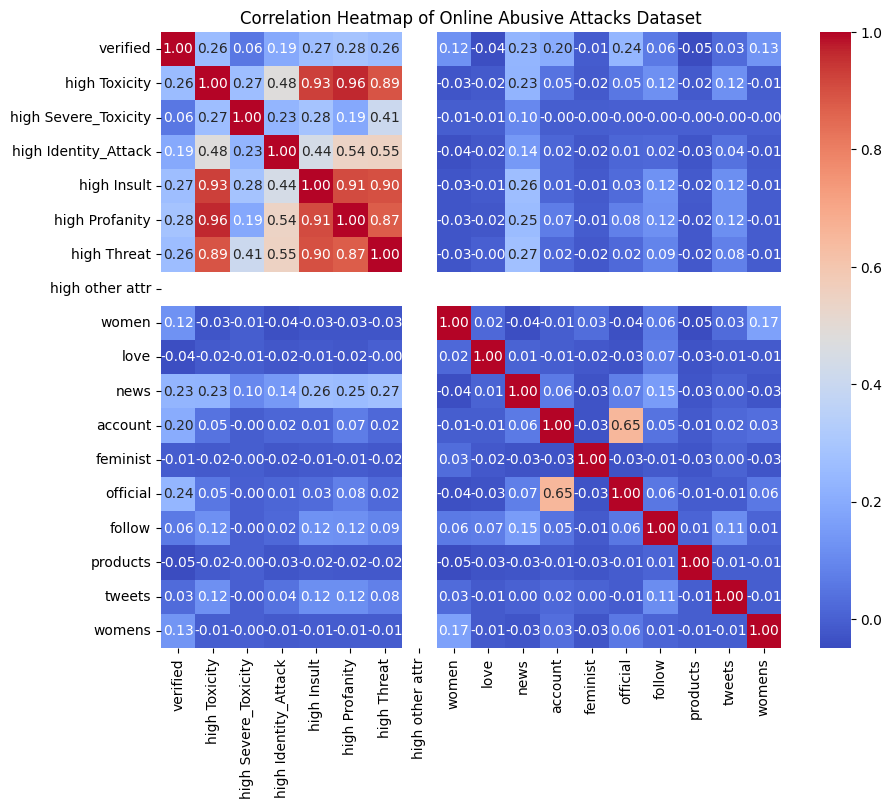

In [56]:
# Create a correlation heatmap of the online_abusive_attacks dataset
plt.figure(figsize=(10, 8))
sns.heatmap(online_abusive_attacks_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Online Abusive Attacks Dataset")
plt.show()

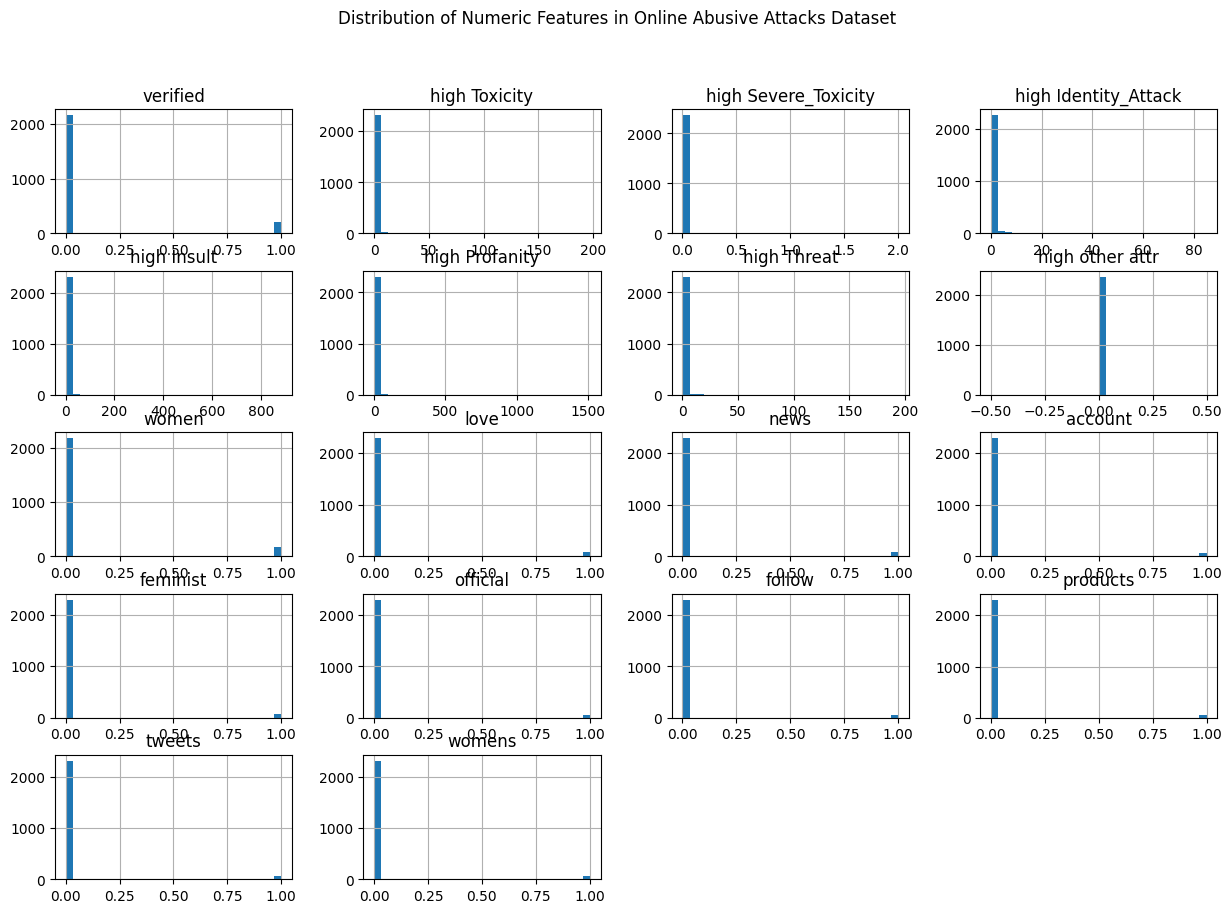

In [57]:
# Generate a histogram of all numeric features in the online_abusive_attacks dataset
online_abusive_attacks_numeric.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features in Online Abusive Attacks Dataset")
plt.show()

In [58]:
# Split the dataset into X_columns and y_columns (using the final 10 columns as X_columns)
online_abusive_attacks_X_columns = online_abusive_attacks.columns[-10:]
online_abusive_attacks_y_columns = online_abusive_attacks.columns[:-10]

In [59]:
# Get the numeric features of the X_columns and y_columns
online_abusive_attacks_X_numeric = online_abusive_attacks[online_abusive_attacks_X_columns].select_dtypes(include=[np.number])
online_abusive_attacks_y_numeric = online_abusive_attacks[online_abusive_attacks_y_columns].select_dtypes(include=[np.number])

In [60]:
online_abusive_attacks_X_numeric.head()

,women,love,news,account,feminist,official,follow,products,tweets,womens
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [61]:
online_abusive_attacks_y_numeric.head()

,verified,high Toxicity,high Severe_Toxicity,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,2.0,0.0,10.0,0.0,0.0
2,0,1.0,0.0,17.0,1.0,25.0,1.0,0.0
3,0,3.0,0.0,9.0,2.0,33.0,2.0,0.0
4,0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


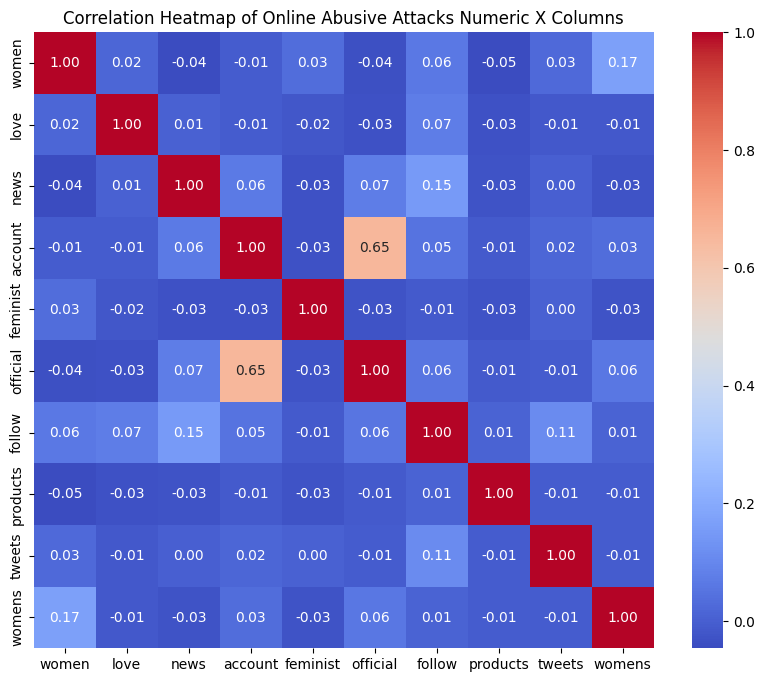

In [62]:
# Get a correlation heatmap of the numeric X_columns only
plt.figure(figsize=(10, 8))
sns.heatmap(online_abusive_attacks_X_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Online Abusive Attacks Numeric X Columns")
plt.show()


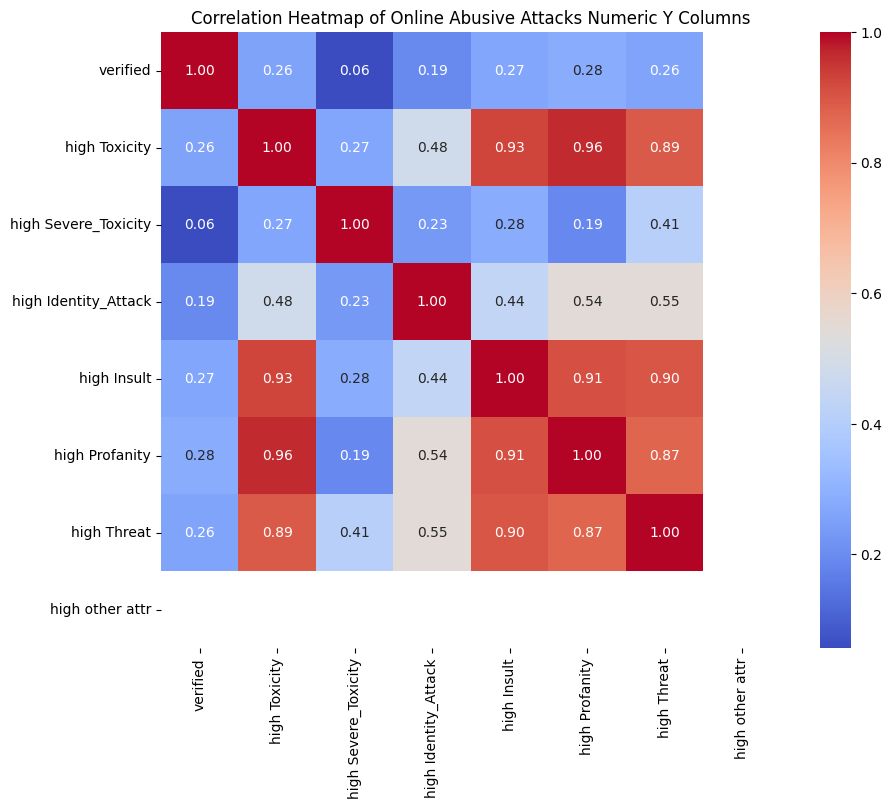

In [63]:
# Get a correlation heatmap of the numeric features of the numeric y_columns
plt.figure(figsize=(10, 8))
sns.heatmap(online_abusive_attacks_y_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Online Abusive Attacks Numeric Y Columns")
plt.show()


In [64]:
# Combine the target columns into a single target column by summing the values of each row
online_abusive_attacks["target"] = online_abusive_attacks[online_abusive_attacks_y_columns].sum(axis=1)
online_abusive_attacks.head()

,verified,high Toxicity,high Severe_Toxicity,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,women,love,news,account,feminist,official,follow,products,tweets,womens,target
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,1.0,0.0,2.0,0.0,10.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,13.0
2,0,1.0,0.0,17.0,1.0,25.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,45.0
3,0,3.0,0.0,9.0,2.0,33.0,2.0,0.0,0,0,0,0,0,0,0,0,0,0,49.0
4,0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,7.0


In [65]:
# Keep only the final 11 columns
online_abusive_attacks = online_abusive_attacks[online_abusive_attacks_X_columns.tolist() + ["target"]]

In [66]:
online_abusive_attacks.head()

,women,love,news,account,feminist,official,follow,products,tweets,womens,target
0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,13.0
2,0,0,0,0,0,0,0,0,0,0,45.0
3,0,0,0,0,0,0,0,0,0,0,49.0
4,0,0,0,0,0,0,0,0,0,0,7.0


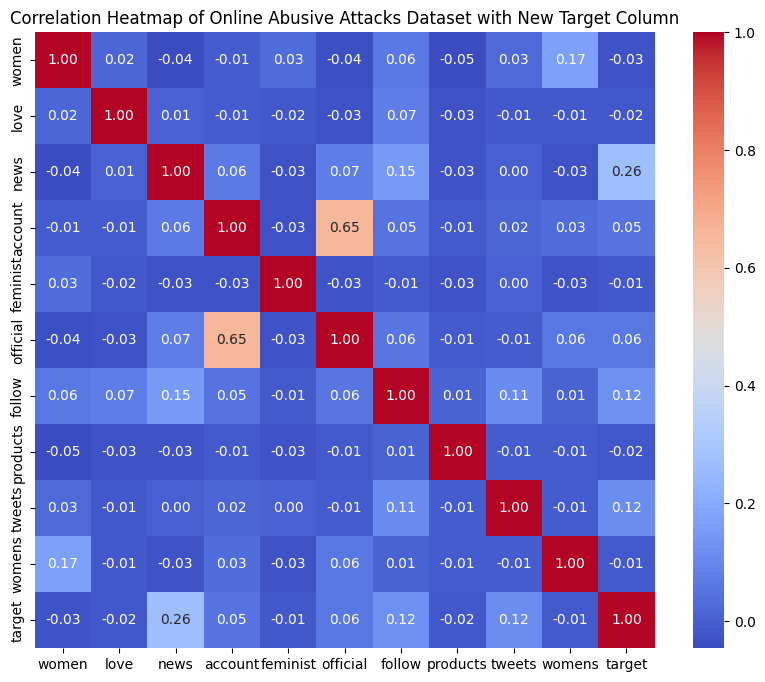

In [67]:
# Create a correlation heatmap of the new dataset
plt.figure(figsize=(10, 8))
sns.heatmap(online_abusive_attacks.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Online Abusive Attacks Dataset with New Target Column")
plt.show()

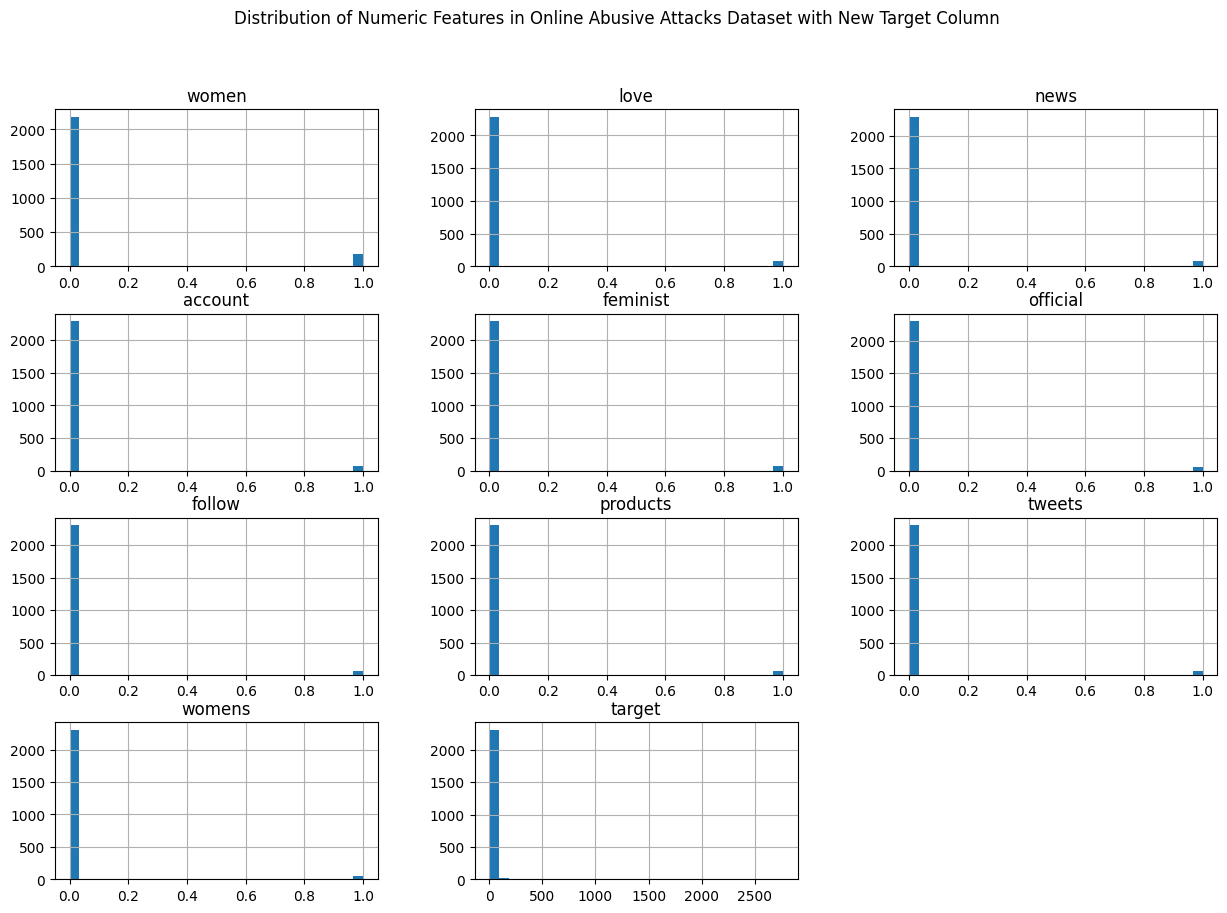

In [68]:
# Create a histogram of all numeric features in the new dataset
online_abusive_attacks.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features in Online Abusive Attacks Dataset with New Target Column")
plt.show()

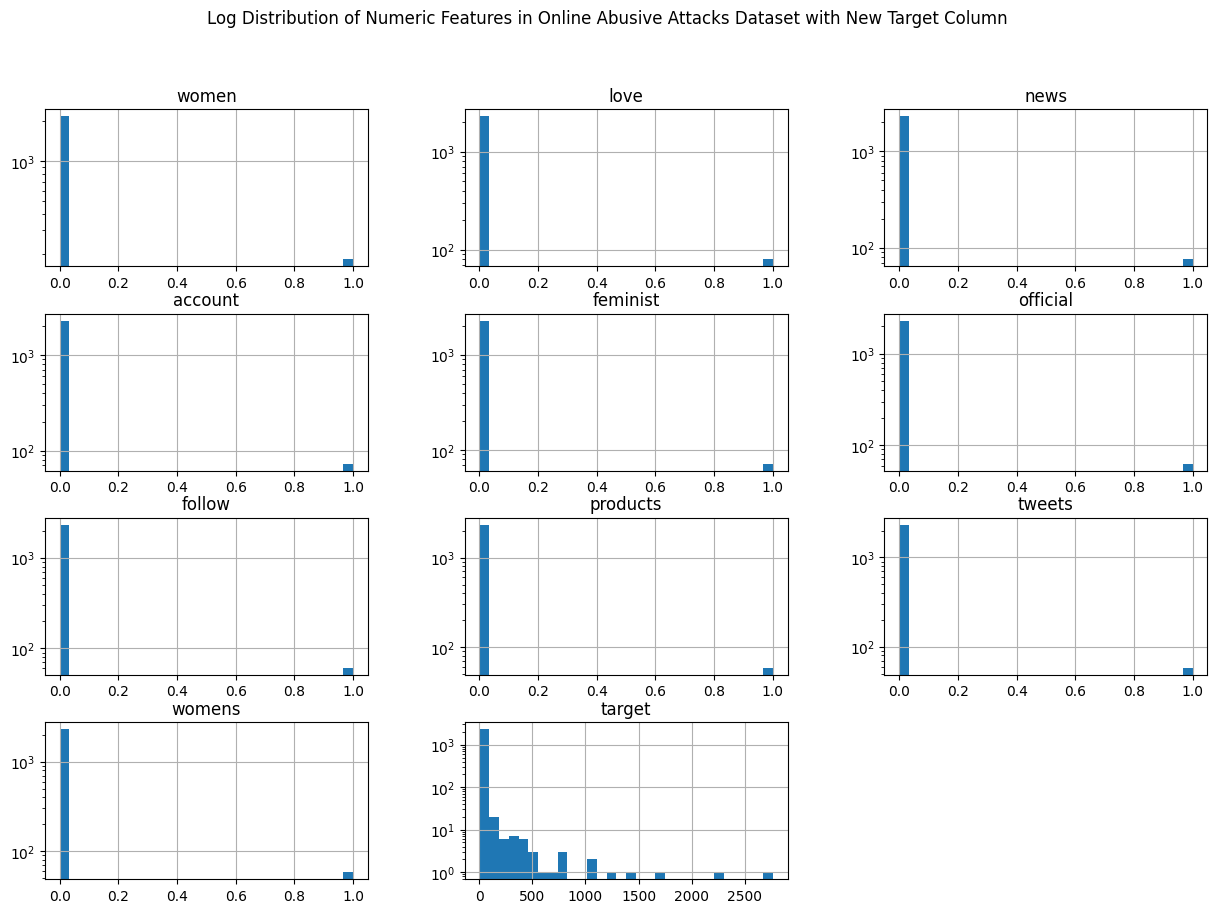

In [69]:
# Plot a log histogram of all numeric features in the balanced dataset
online_abusive_attacks.hist(bins=30, figsize=(15, 10), log=True)
plt.suptitle("Log Distribution of Numeric Features in Online Abusive Attacks Dataset with New Target Column")
plt.show()

In [70]:
# Get the unique values of the new target column
online_abusive_attacks["target"].nunique()

118

In [71]:
# Output the dataframe as a CSV file
online_abusive_attacks.to_csv("data/online_abusive_attacks_final.csv", index=False)